# **1. Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from textblob import TextBlob

In [2]:
# Settings for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# **2. Load Dataset**

In [3]:
# Load into DataFrame
df = pd.read_csv('/content/netflix_titles.csv')

# Display basic info
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **3. Data Cleaning**

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df['date_added'] = df['date_added'].str.strip()  # Remove extra spaces
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert safely

In [6]:
df['country'].fillna('Unknown')

,country
0,United States
1,South Africa
2,Unknown
3,Unknown
4,India
...,...
8802,United States
8803,Unknown
8804,United States
8805,United States


In [7]:
df['rating'].fillna('Not Rated')

,rating
0,PG-13
1,TV-MA
2,TV-MA
3,TV-MA
4,TV-MA
...,...
8802,R
8803,TV-Y7
8804,R
8805,PG


In [8]:
df['cast'].fillna('Not Available')

,cast
0,Not Available
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Not Available
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,Not Available
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [9]:
df['director'].fillna('Not Available')

,director
0,Kirsten Johnson
1,Not Available
2,Julien Leclercq
3,Not Available
4,Not Available
...,...
8802,David Fincher
8803,Not Available
8804,Ruben Fleischer
8805,Peter Hewitt


# **4. Feature Engineering**

In [10]:
df['year_added'] = df['date_added'].dt.year

In [11]:
df['month_added'] = df['date_added'].dt.month

In [12]:
df['genre_list'] = df['listed_in'].apply(lambda x: x.split(', '))

In [13]:
df['year'] = pd.to_numeric(df['release_year'], errors='coerce')

# **5. Reusable Plot Function**

In [14]:
def plot_top_values(df, column, top_n=10, title="", horizontal=False, color='skyblue'):
    data = df[column].value_counts().head(top_n)
    if horizontal:
        data.plot(kind='barh', color=color)
        plt.xlabel('Count')
    else:
        data.plot(kind='bar', color=color)
        plt.ylabel('Count')
    plt.title(title)
    plt.show()

# **6. Univariate Visuals + Observations**

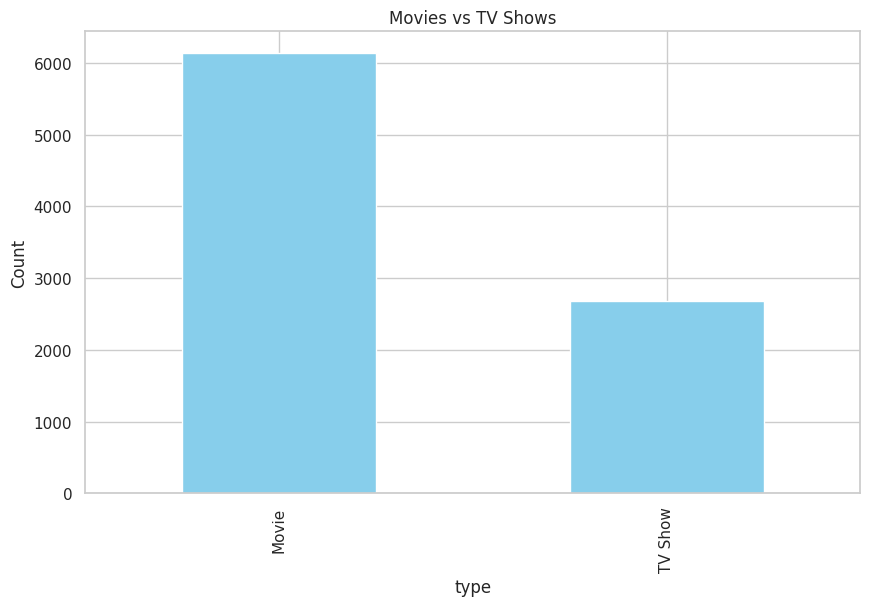

In [15]:
plot_top_values(df, 'type', title="Movies vs TV Shows")

# Observation:
# Netflix has more movies than TV shows, indicating focus on film-based content.

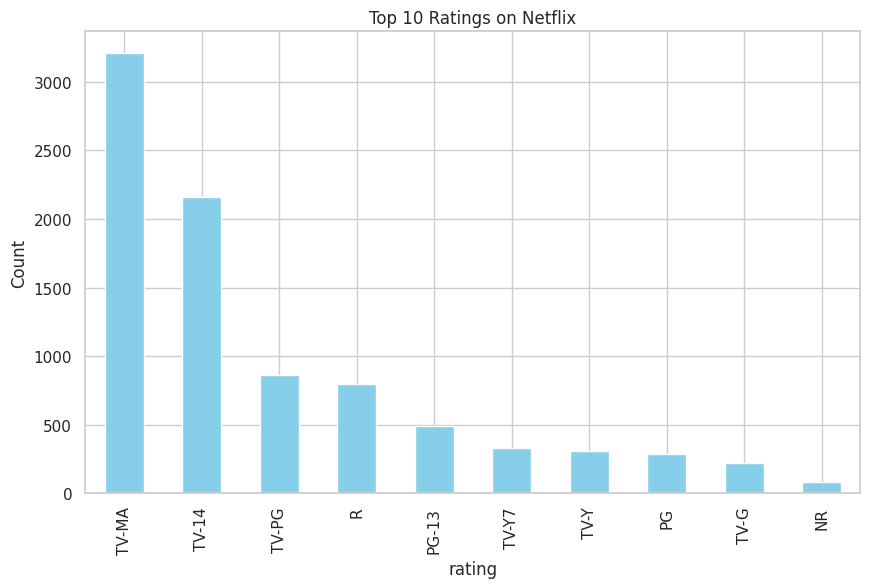

In [16]:
plot_top_values(df, 'rating', title="Top 10 Ratings on Netflix")

# Observation:
# TV-MA, TV-14, and R are most common, showing a large volume of content for mature audiences.

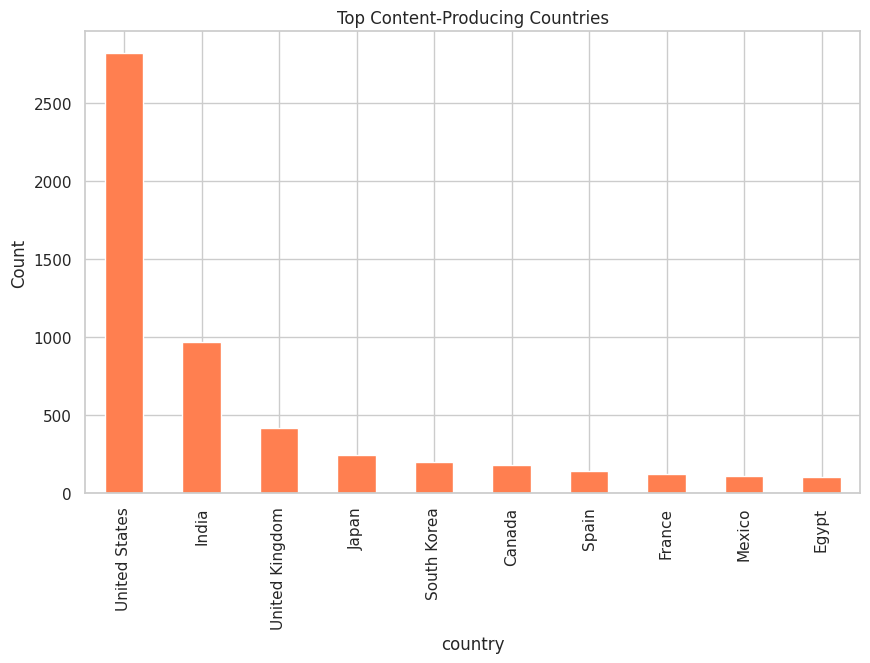

In [17]:
plot_top_values(df, 'country', title="Top Content-Producing Countries", color='coral')

# Observation:
# US is the dominant country for Netflix content, followed by India and the UK.

# **7. Temporal Analysis**

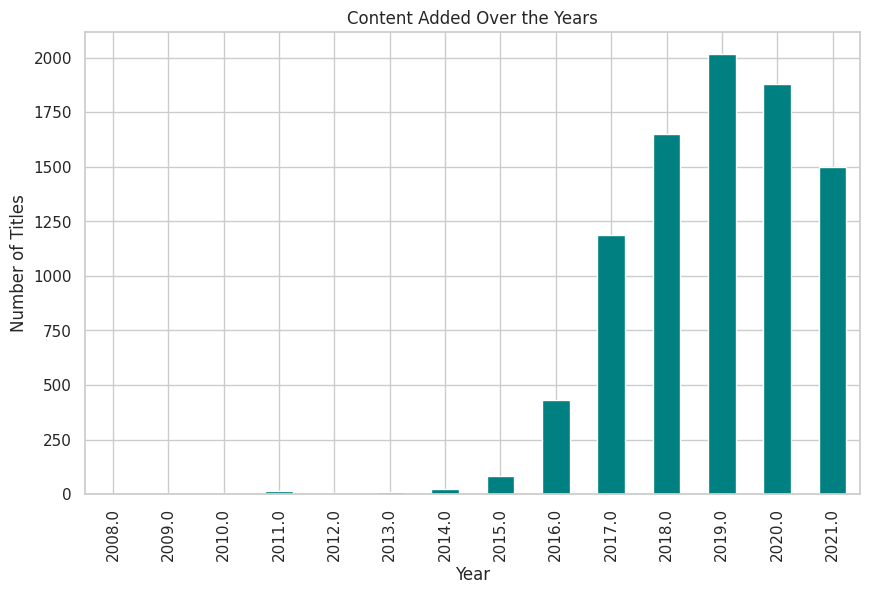

In [18]:
df['year_added'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Observation:
# Major spike around 2018–2020 as Netflix rapidly expanded its library.

# **8. Genre Breakdown**

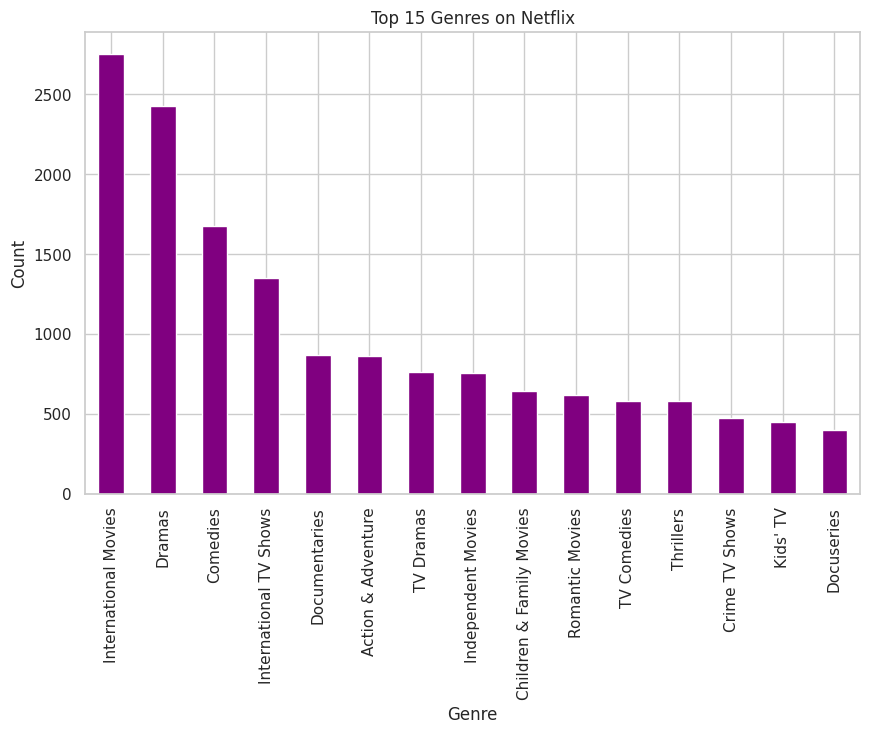

In [19]:
flat_genres = Counter([genre for sublist in df['genre_list'] for genre in sublist])
genre_df = pd.DataFrame.from_dict(flat_genres, orient='index').sort_values(by=0, ascending=False).head(15)
genre_df.plot(kind='bar', legend=False, color='purple')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Observation:
# International TV, Dramas, and Comedies are most represented genres.

# **9. Director & Cast Insights**

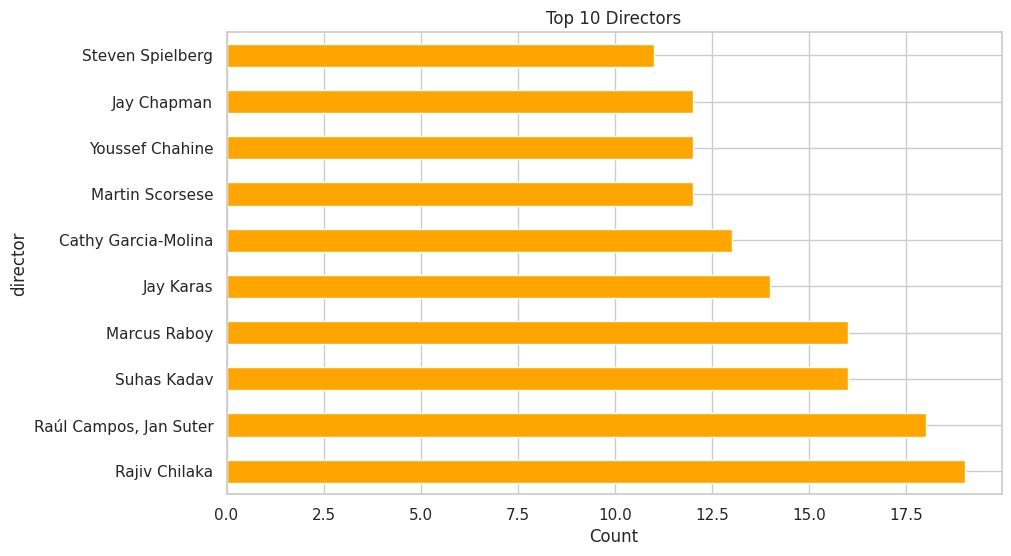

In [20]:
plot_top_values(df[df['director'] != 'Not Available'], 'director', 10,
                title="Top 10 Directors", horizontal=True, color='orange')

# Observation:
# Raúl Campos and Jan Suter are prolific, likely involved in Netflix originals.

# **10. Interactive Plot with Plotly**

In [21]:
fig = px.histogram(df[df['country'] != 'Unknown'], x='country', color='type',
                   category_orders={"country": df['country'].value_counts().index[:10]},
                   title="Top Countries by Content Type", nbins=30)
fig.show()

# **11. Text-Based Analysis – Description Sentiment**

In [22]:
# Drop rows with missing descriptions
df['description'].fillna('')

,description
0,"As her father nears the end of his life, filmm..."
1,"After crossing paths at a party, a Cape Town t..."
2,To protect his family from a powerful drug lor...
3,"Feuds, flirtations and toilet talk go down amo..."
4,In a city of coaching centers known to train I...
...,...
8802,"A political cartoonist, a crime reporter and a..."
8803,"While living alone in a spooky town, a young g..."
8804,Looking to survive in a world taken over by zo...
8805,"Dragged from civilian life, a former superhero..."


In [23]:
# Sentiment Score using TextBlob
df['polarity'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

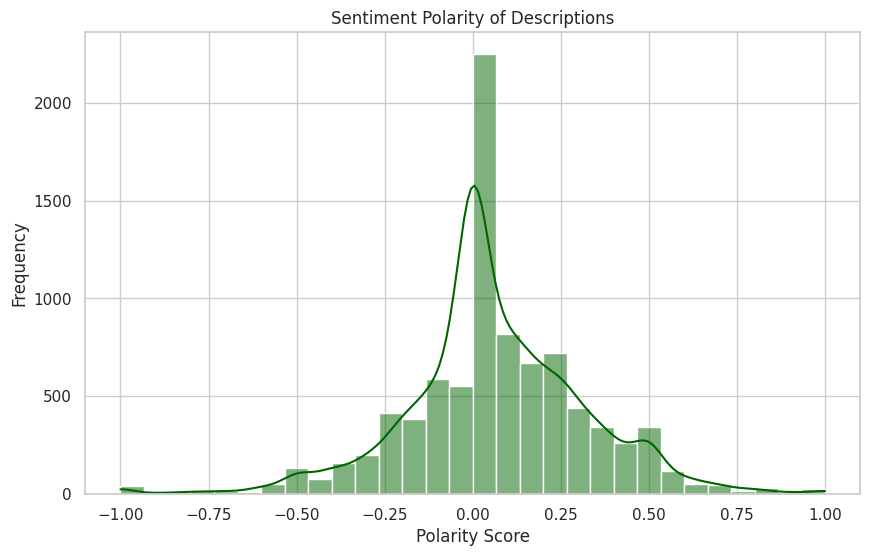

In [24]:
# Plot distribution
sns.histplot(df['polarity'], bins=30, kde=True, color='darkgreen')
plt.title("Sentiment Polarity of Descriptions")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

# Observation:
# Majority of content descriptions have slightly positive tone.